In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [120]:
job="game_developer"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [121]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Xogar Games,Unreal Game Developer (Freelancer),Bengaluru,700000.0,"Unreal Engine, C++, Math, C, AI",NaN,Game Developer
1,Xogar Games,Unreal Game Developer,Bengaluru,700000.0,"Unreal Engine, C++, C, AI, Debugging",NaN,Game Developer
2,Helius Technologies,Unity Developer (Hyper Casual),India,0.0,"CI/CD, TCP, C#, iOS, Git",4.2,Game Developer
3,[x]cube LABS,Game Designer,Hyderābād,500000.0,"Research, AWS, Communication skills",4.4,Game Developer
4,Logical Soft Tech Private Limited,Game Developer,Indore,258000.0,"2D animation, CSS, Unreal Engine, C#, iOS",3.4,Game Developer


In [122]:
df.isnull().sum()

company_name              0
job_role                  0
job_location              0
salary_pa                 0
skills                    2
company_rating           79
standardized_job_role     0
dtype: int64

In [123]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [124]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
2,Helius Technologies,Unity Developer (Hyper Casual),India,0.0,"CI/CD, TCP, C#, iOS, Git",4.2,Game Developer
8,M365Connect,Internship Opportunity: Microsoft Exchange Adm...,Bengaluru,0.0,"Encryption, English, Microsoft Exchange, Admin...",NaN,Game Developer
14,Jambox Games,Unity Game Developer,Delhi,0.0,"C#, .NET, OOP, SDKs, Unity",5.0,Game Developer
15,VizExperts,"Game Developer (Unreal Engine, UE4, Unity3D)",Delhi,0.0,"Unreal Engine, Unity",2.7,Game Developer
17,Photontadpole,Junior Game Developer,India,0.0,"Unreal Engine, C#, iOS, .NET, Java",5.0,Game Developer
...,...,...,...,...,...,...,...
187,Mobzway Technologies,Unity Intern,Jaipur,0.0,"OOP, Scripting, Unity",3.8,Game Developer
188,YsecIT,Unity3D,Bengaluru,0.0,"Visual Studio, Data structures, C#, iOS, Windows",4.5,Game Developer
189,MadOverGames,Lead Unity3D Developer,Delhi,0.0,"C#, .NET, Unity, Agile, Communication skills",4.3,Game Developer
190,Aristocrat,Technical Lead (Unity Developer),Noida,0.0,"iOS, Scripting, Unity, SDLC",3.7,Game Developer


### Filling the null values by replacing with average salary of company rating

In [126]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [127]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [128]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Xogar Games,Unreal Game Developer (Freelancer),Bengaluru,7.000000,"Unreal Engine, C++, Math, C, AI",0.0,Game Developer
1,Xogar Games,Unreal Game Developer,Bengaluru,7.000000,"Unreal Engine, C++, C, AI, Debugging",0.0,Game Developer
2,Helius Technologies,Unity Developer (Hyper Casual),India,25.783333,"CI/CD, TCP, C#, iOS, Git",4.2,Game Developer
3,[x]cube LABS,Game Designer,Hyderābād,5.000000,"Research, AWS, Communication skills",4.4,Game Developer
4,Logical Soft Tech Private Limited,Game Developer,Indore,2.580000,"2D animation, CSS, Unreal Engine, C#, iOS",3.4,Game Developer
...,...,...,...,...,...,...,...
192,AtkinsRéalis,Lead Unreal Developer,Gurgaon,12.000000,"Unreal Engine, Git, English, C++, 3ds Max",4.1,Game Developer
193,PradeepIT Consulting Services,Senior 2D JavaScript Game Developer-6+ years(R...,Bengaluru,5.000000,"2D animation, CSS, Calculus, Git, Math",4.5,Game Developer
194,Reliance Games,Associate Community Engagement Executive,Pune,6.500000,"Computer networking, Communication skills",3.3,Game Developer
195,Techved,Sr. Unity Developer,Mumbai,5.500000,"Mobile applications, C#, iOS, Git, .NET",3.6,Game Developer


In [129]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [130]:
df.describe()

,salary_lpa,company_rating
count,197.000000,197.000000
mean,10.831533,2.351269
std,12.603475,1.999965
min,0.300000,0.000000
25%,4.035938,0.000000
50%,5.750000,3.300000
75%,7.800000,4.100000
max,48.000000,5.000000


In [131]:
df.nunique()

company_name             153
job_role                  87
job_location              29
salary_lpa                59
skills                   170
company_rating            27
standardized_job_role      1
dtype: int64

In [132]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [134]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [135]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                   Skill  Count
8                     c#    121
33                  .net    105
35                 unity     74
10                   git     53
0          unreal engine     45
..                   ...    ...
66         colour theory      1
67       design thinking      1
72   android development      1
74    performance tuning      1
101     customer service      1

[102 rows x 2 columns]


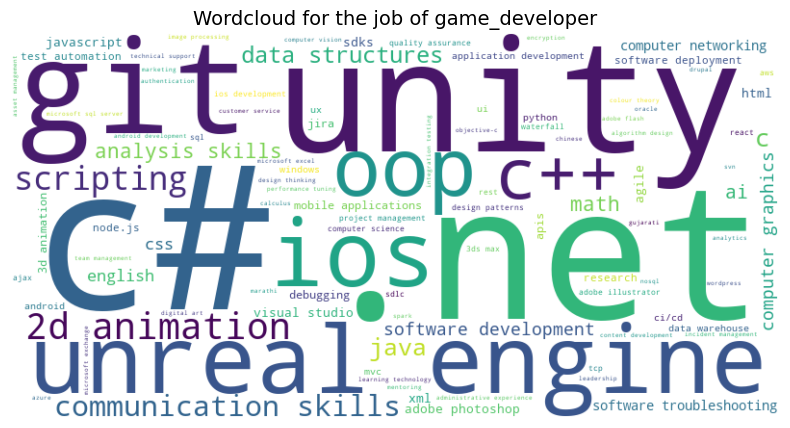

In [136]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


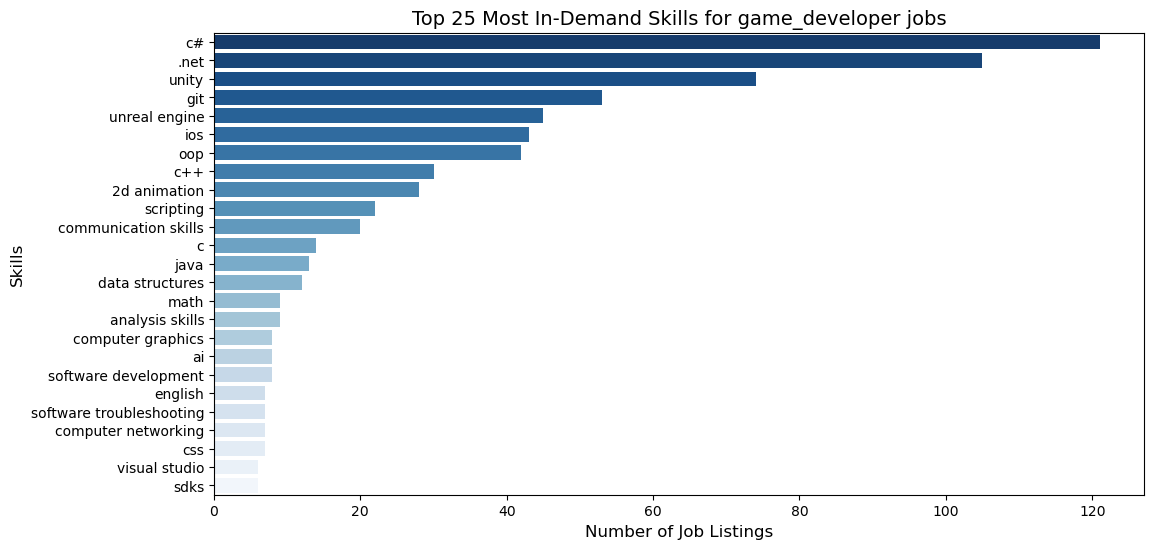

In [137]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [139]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                           company_name  salary_lpa
31   CONSULTREE CONSULTING SERVICES LLC   48.000000
64                              Infocom   48.000000
16                       AppOn Software   48.000000
49               GameCloud Technologies   43.200000
5                        AIS Technolabs   42.000000
30                                  CIS   42.000000
33                             CloudZon   42.000000
151                         iXie Gaming   40.594444
123       Technorizen Software Solution   36.000000
103              Red Apple Technologies   36.000000


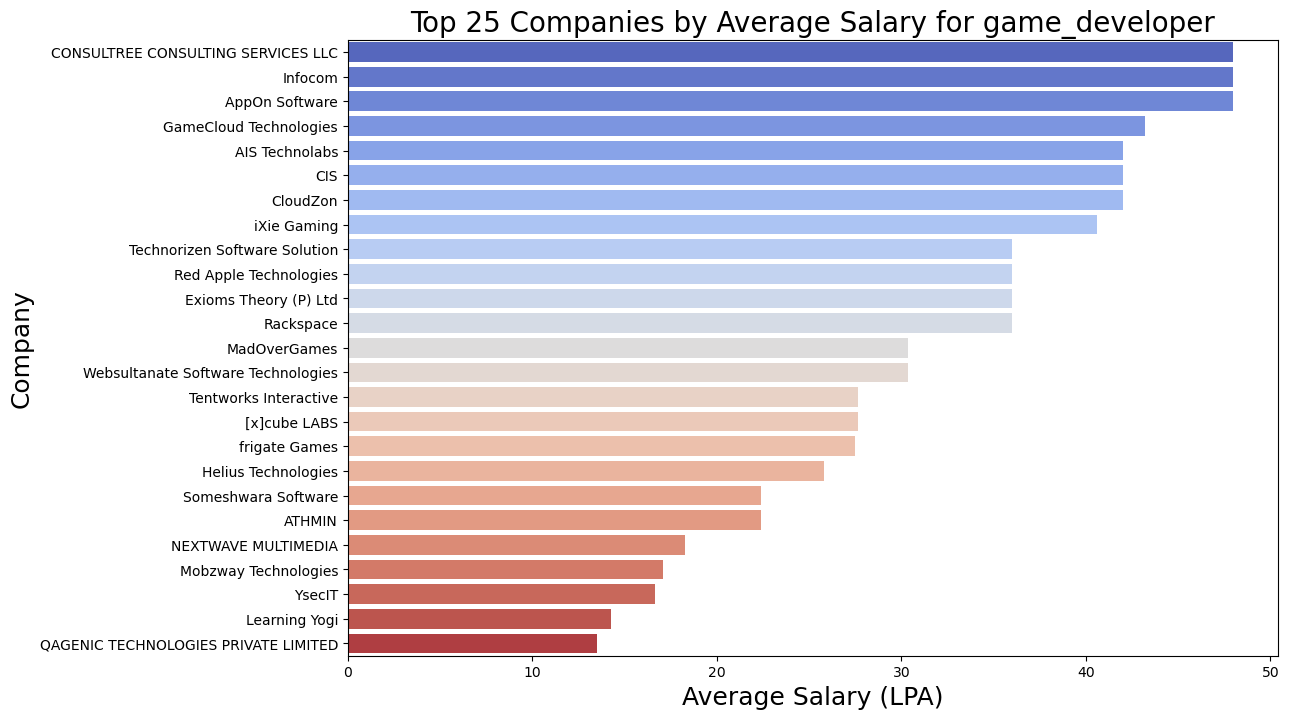

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

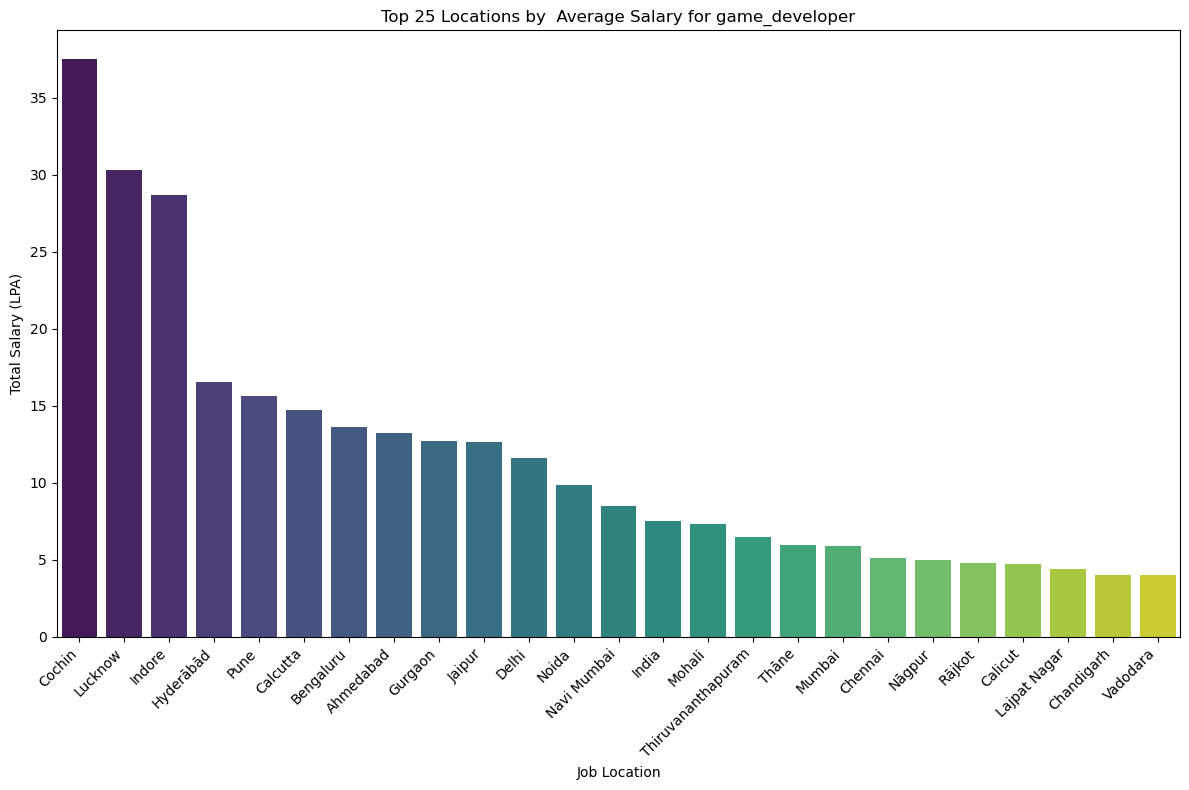

In [142]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

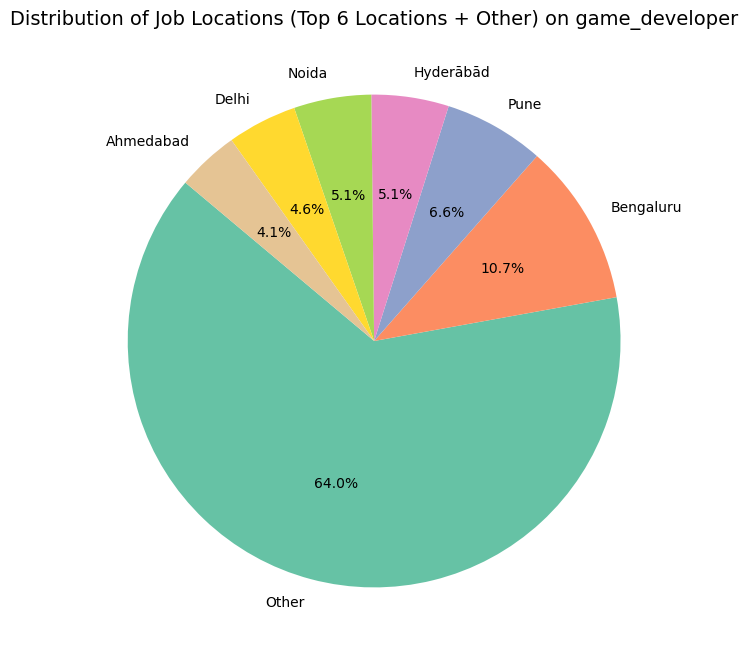

In [143]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

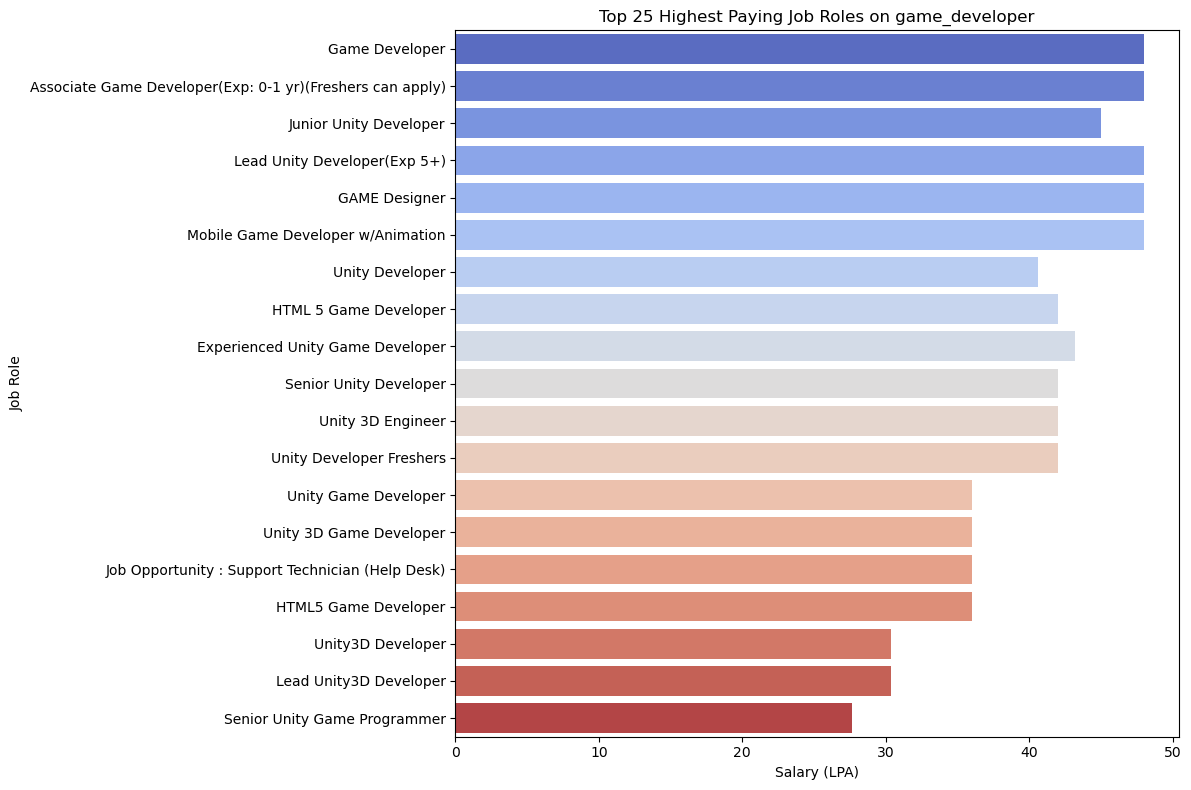

In [145]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [147]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_25956\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


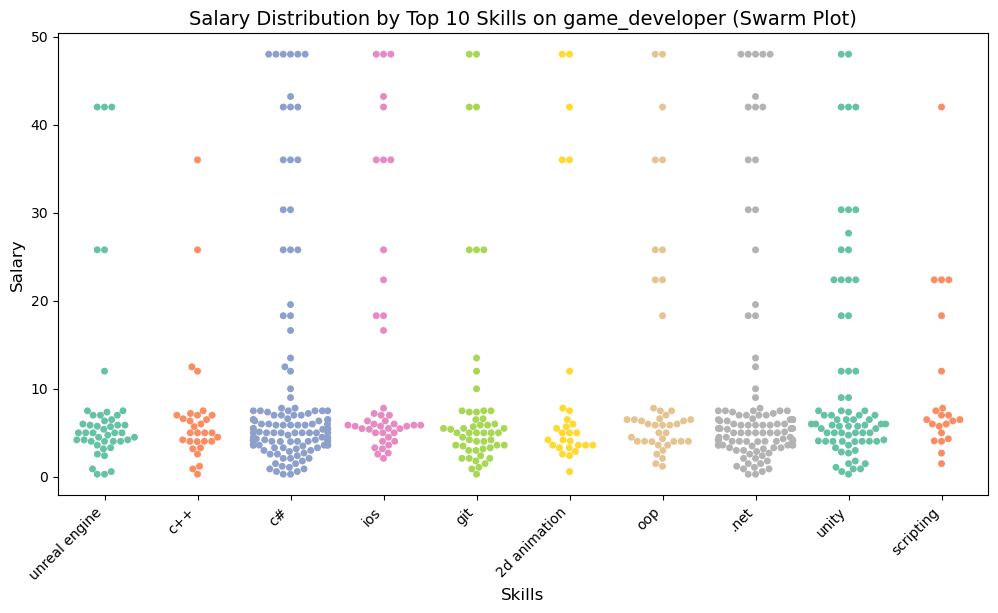

In [148]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

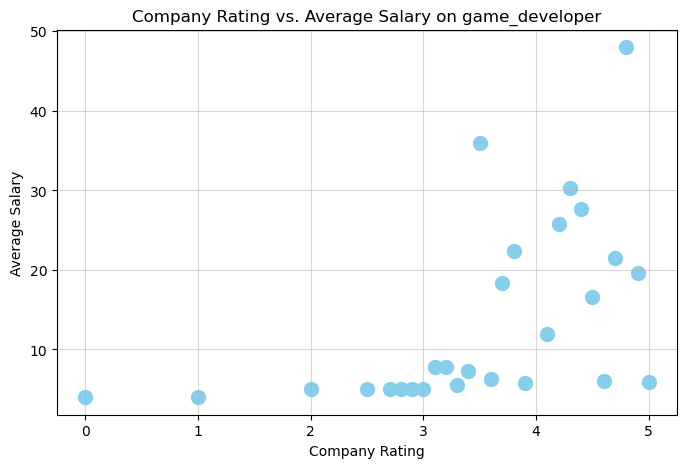

In [150]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [151]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.27373836027254805